<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/%D0%9C%D0%9E%D0%B4%D0%B78skl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Библиотеки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Файл

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/glassdor_norm.csv', delimiter = ',')
df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
0,0.371667,-0.602106,-1.060046,-0.548583,-0.134175,-1.126001,-1.523631,-0.180489,-1.243051,-0.500995,-1.125080,2
1,-0.435397,-1.757818,-1.060046,-1.876647,0.599324,-1.126001,-1.523631,-0.180489,-0.440152,1.510099,-1.125080,2
2,-1.765328,-1.757818,-1.737748,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,1.336289,-1.702864,-0.742651,1
3,-1.157151,-0.602106,-1.060046,-1.287863,-0.134175,-1.126001,-1.523631,-0.180489,0.133422,-0.500995,-0.742651,5
4,-1.157151,-1.757818,-1.060046,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,0.857410,-0.500995,-0.742651,1
...,...,...,...,...,...,...,...,...,...,...,...,...
78147,0.371667,1.097816,-0.315610,-0.548583,-0.134175,0.762872,0.950898,-0.180489,-1.566673,-0.193836,-1.820608,4
78148,1.248749,0.189624,-1.060046,0.309266,-0.867685,-1.126001,-0.036809,-0.180489,-1.399104,-0.193836,-1.820608,2
78149,-0.435397,-1.260705,0.475768,0.309266,-0.134175,-1.126001,0.950898,-0.180489,-1.399104,-0.193836,-1.820608,3
78150,-0.435397,0.189624,-0.315610,0.309266,0.599324,0.762872,0.950898,-0.180489,-1.243051,-0.193836,-1.820608,4


#Обработка и базовая модель
из [дз3](https://colab.research.google.com/drive/1a4RFiGsSl2d-iMN79B65OWxtGLj44QTf#scrollTo=3na21g3cY-iX)

##Обработка
из [дз1](https://colab.research.google.com/drive/1w9Er_B6u6Wt-PEptbl9mZ-27SWZ17csi?usp=sharing#scrollTo=HPI2T56DK9Tp)

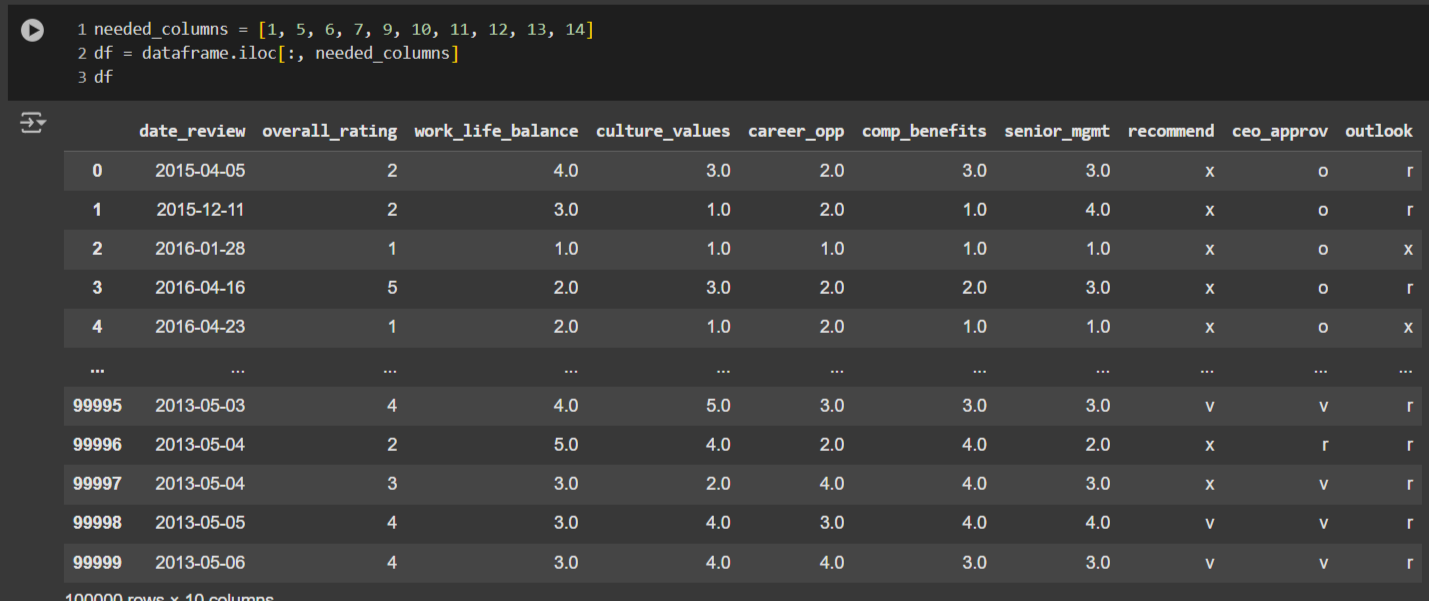

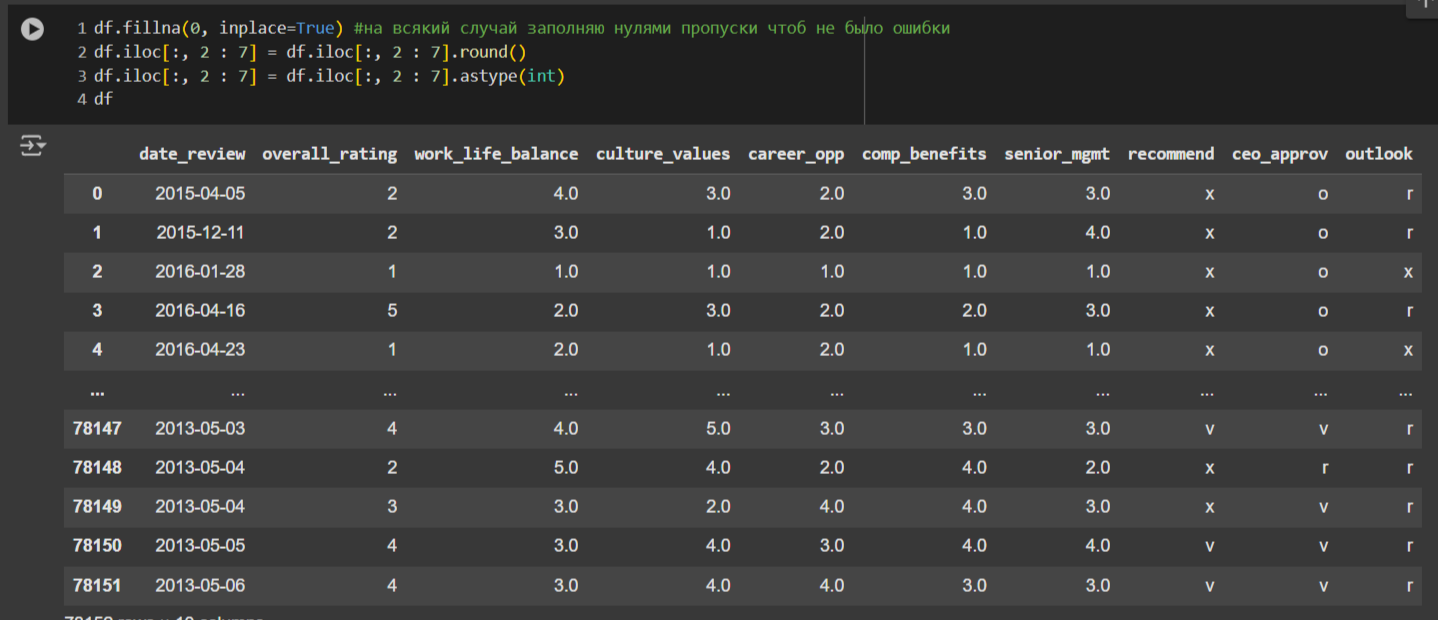

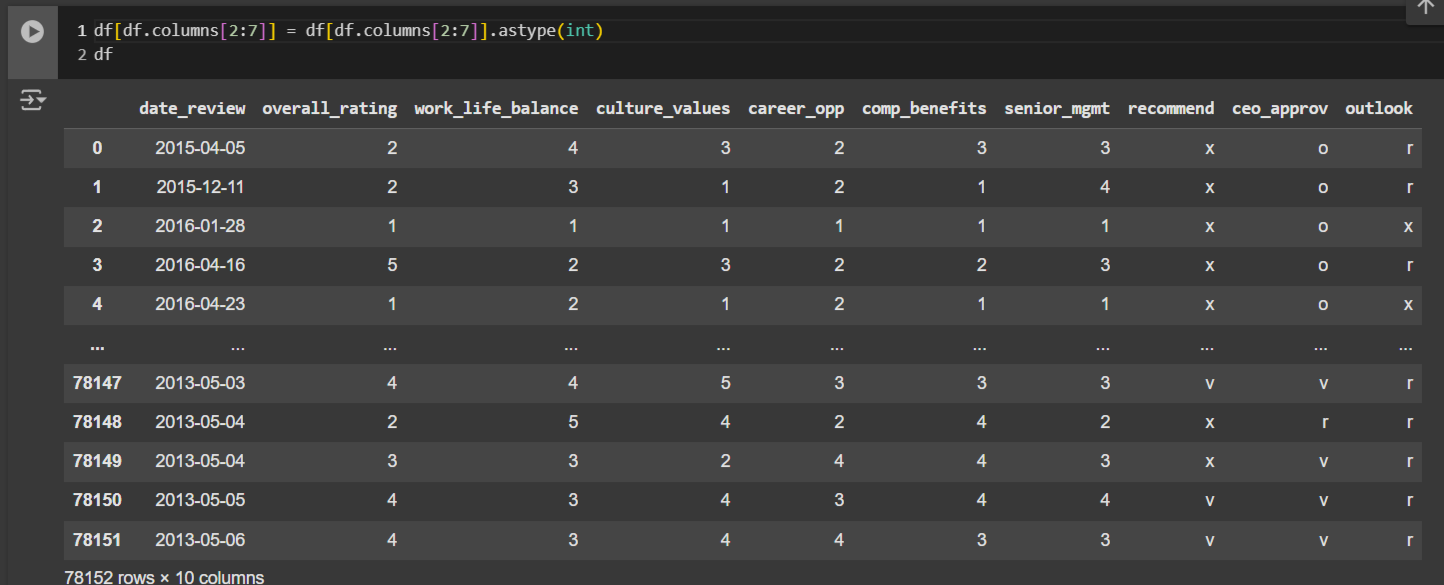

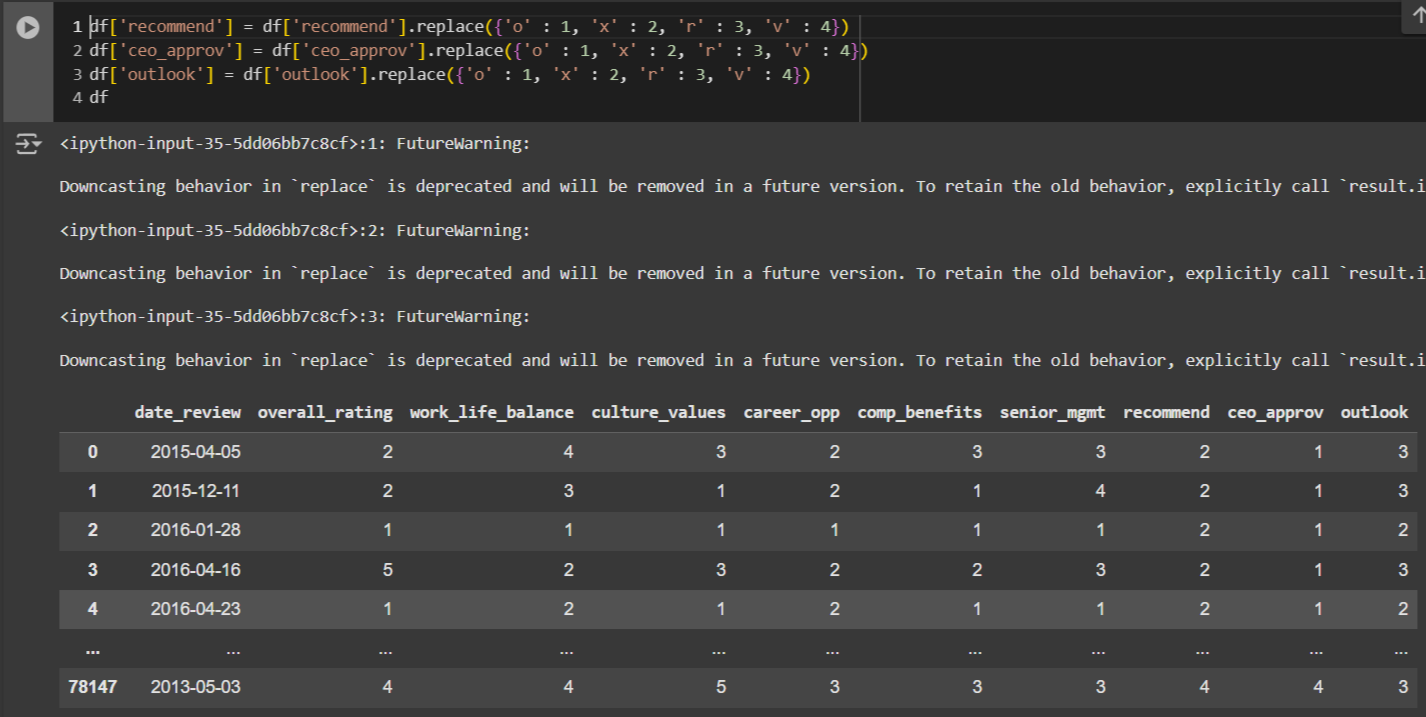

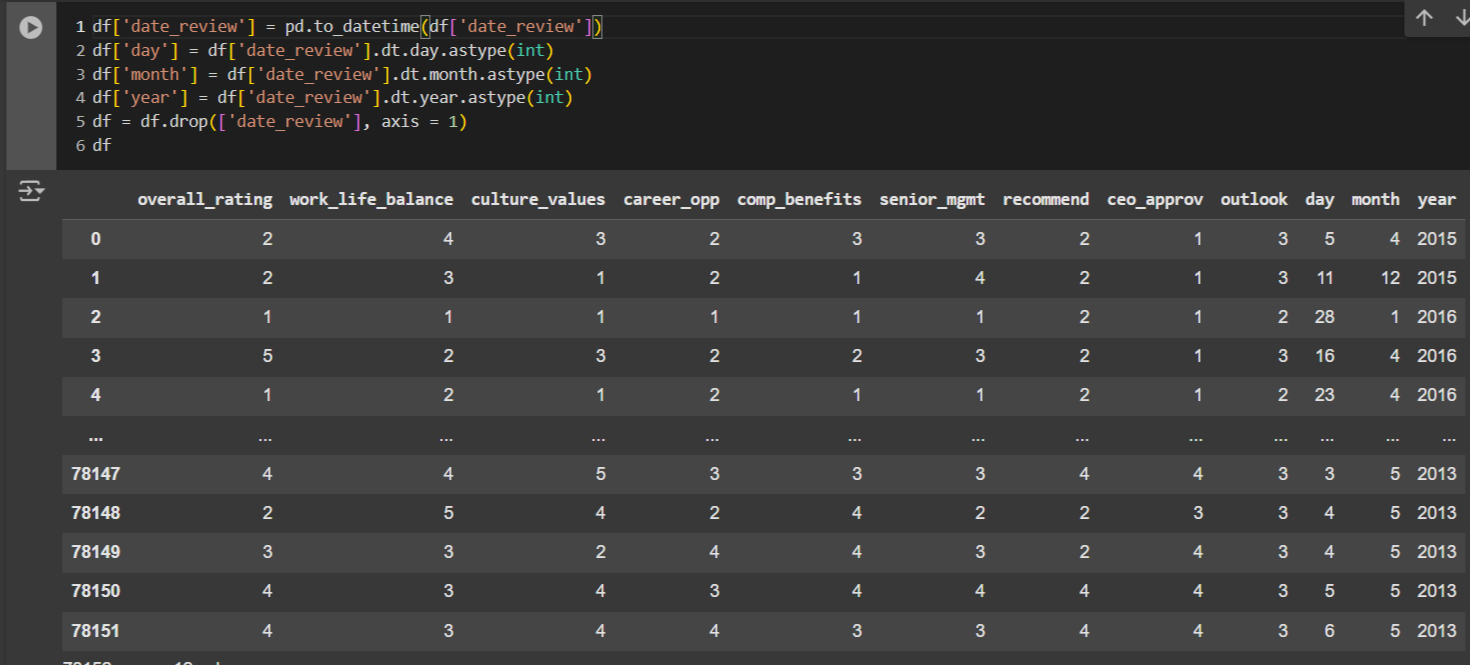

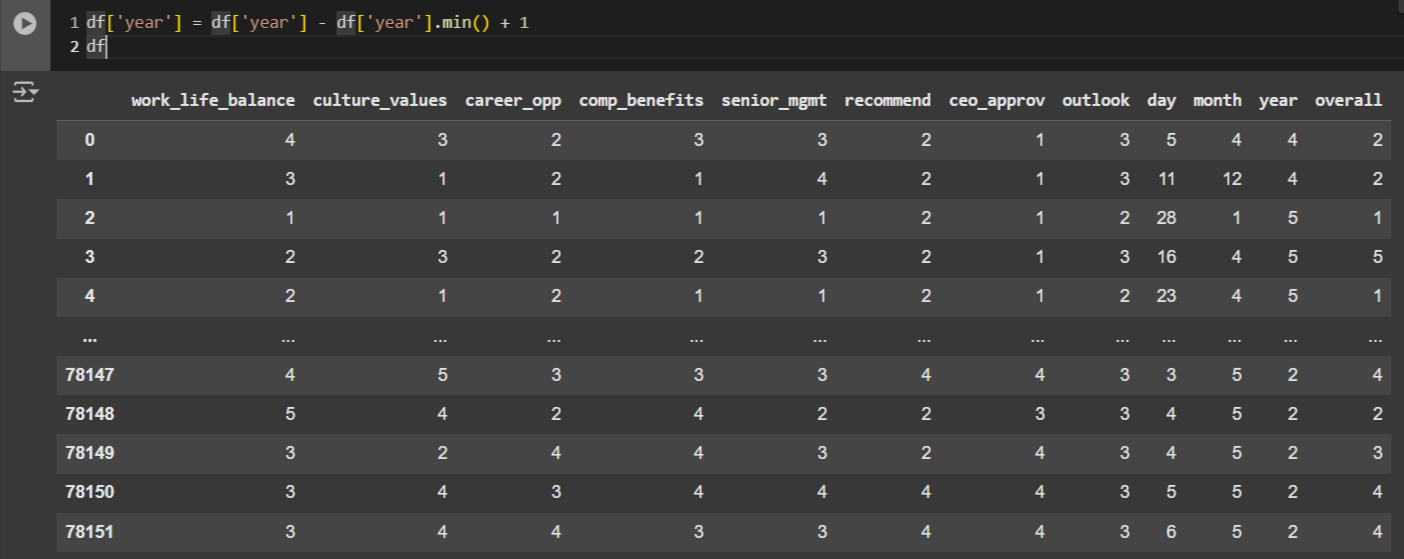

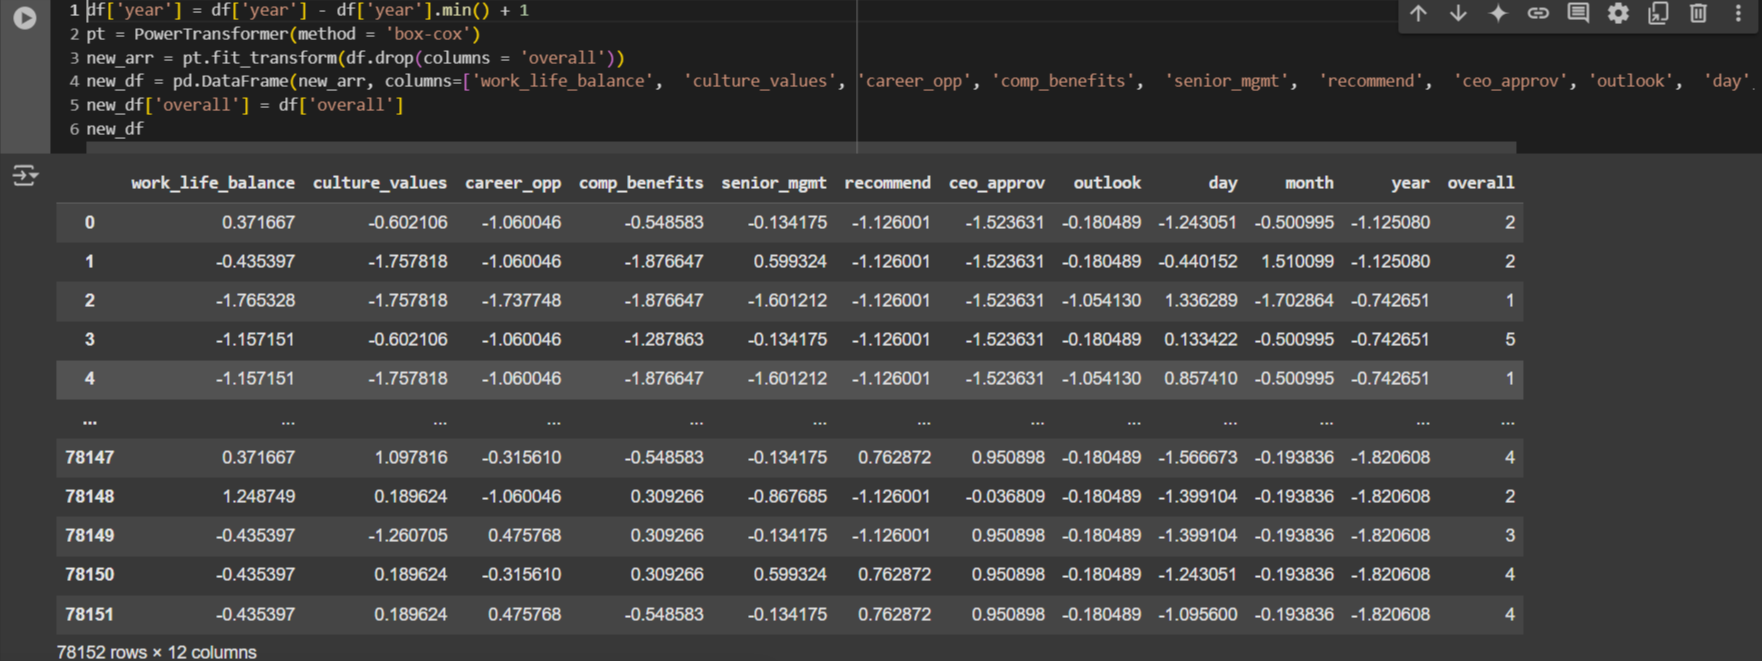

##Базовая модель

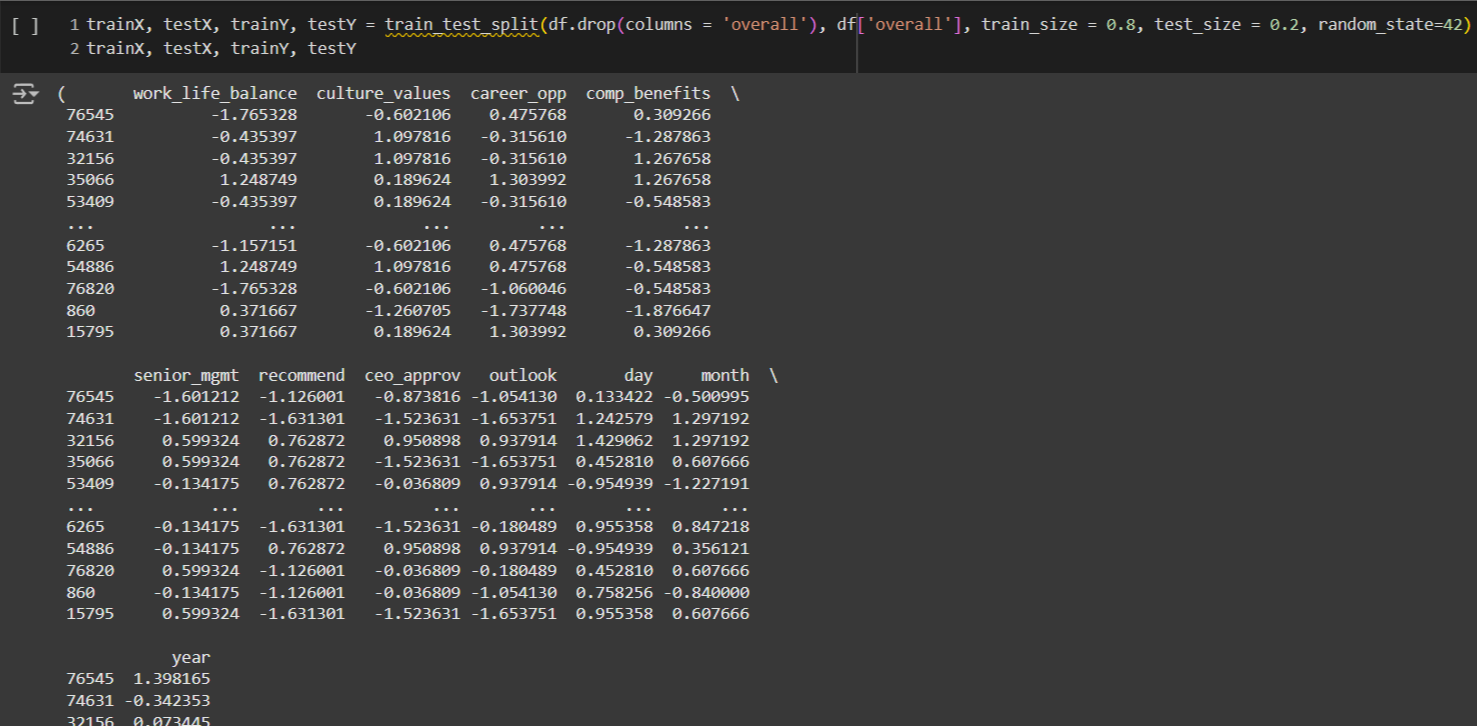

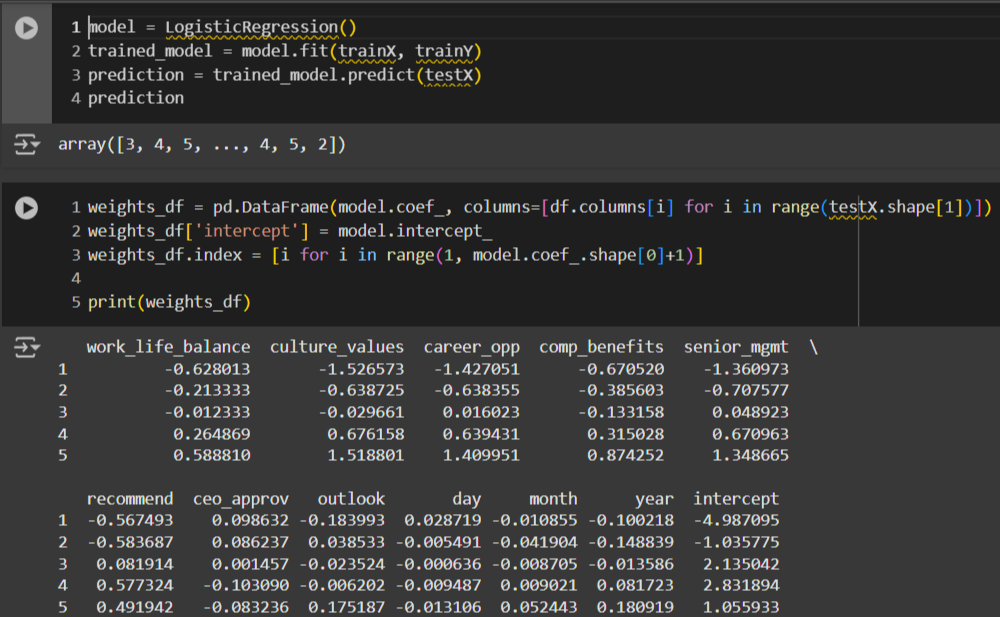

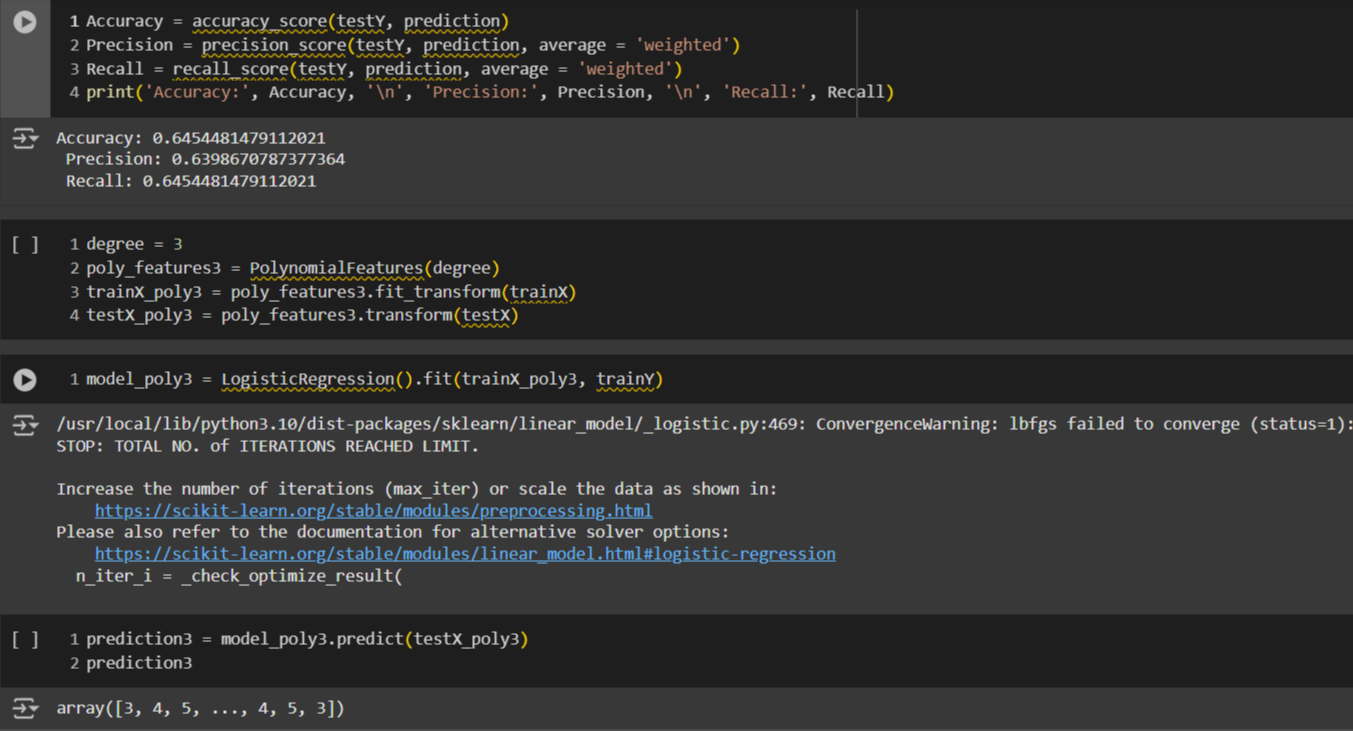

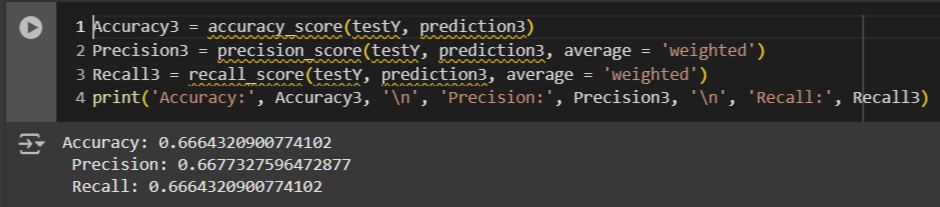

#Сложная модель

In [ ]:
gboost = GradientBoostingClassifier()

In [ ]:
trainX, testX, trainY, testY = train_test_split(df.drop(columns = 'overall'), df['overall'], train_size = 0.8, test_size = 0.2, random_state=42)
trainX, testX, trainY, testY

(       work_life_balance  culture_values  career_opp  comp_benefits  \
 76545          -1.765328       -0.602106    0.475768       0.309266   
 74631          -0.435397        1.097816   -0.315610      -1.287863   
 32156          -0.435397        1.097816   -0.315610       1.267658   
 35066           1.248749        0.189624    1.303992       1.267658   
 53409          -0.435397        0.189624   -0.315610      -0.548583   
 ...                  ...             ...         ...            ...   
 6265           -1.157151       -0.602106    0.475768      -1.287863   
 54886           1.248749        1.097816    0.475768      -0.548583   
 76820          -1.765328       -0.602106   -1.060046      -0.548583   
 860             0.371667       -1.260705   -1.737748      -1.876647   
 15795           0.371667        0.189624    1.303992       0.309266   
 
        senior_mgmt  recommend  ceo_approv   outlook       day     month  \
 76545    -1.601212  -1.126001   -0.873816 -1.054130  0.13

In [ ]:
gboost.fit(trainX, trainY)
y_pred = gboost.predict(testX)
accuracy = gboost.score(testX, testY)
print(f"Accuracy of Gradient Boosting model: {accuracy}")

Accuracy of Gradient Boosting model: 0.664576802507837


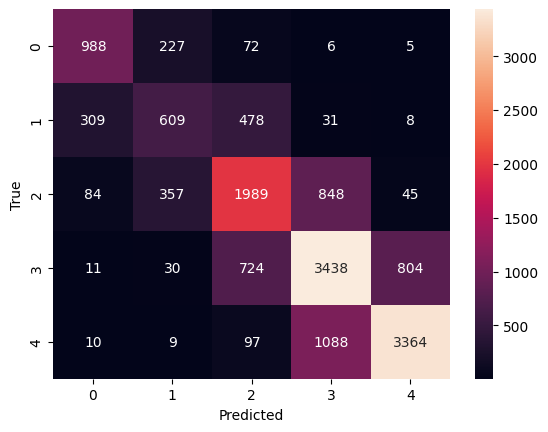

In [ ]:
pred = gboost.predict(testX)
cm = sns.heatmap(confusion_matrix(testY, pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

в целом результат неплохой, хоть точность и небольшая. но по графику видно, что большинство значений все же были определены правильно, также чаще всего были выбраны смежные с правильными значения итоговой оценки.


#Улучшение

In [ ]:
# Обучаем модель градиентного бустинга только на топовых признаках
from sklearn.metrics import accuracy_score
n_top_features = 10
top_features = gboost.feature_importances_.argsort()[::-1][:n_top_features]
top_features_names = [trainX.columns[i] for i in top_features]
X_train_top = trainX.loc[:, top_features_names]
X_test_top = testX.loc[:, top_features_names]
gboost_top = GradientBoostingClassifier(n_estimators=100, random_state=42)
gboost_top.fit(X_train_top, trainY)

# Оцениваем качество обучения обеих моделей
y_pred_all = gboost.predict(testX)
y_pred_top = gboost_top.predict(X_test_top)
print("Качество обучения модели на всех признаках:", accuracy)
print("Качество обучения модели на топовых признаках:", accuracy_score(testY, y_pred_top))

Качество обучения модели на всех признаках: 0.664576802507837
Качество обучения модели на топовых признаках: 0.6632972938391658


Использование только топ признаков не помогло, хотелось использовать гридсерч, но он грузил больше чем полтора часа.

In [ ]:
# param_grid = {
#     'n_estimators': [50, 300, 550],
#     'max_depth': [6, 11, 16],
#     'learning_rate': [0.01, 0.03, 0.05]
# }

# grid_search_dt = GridSearchCV(gboost, param_grid, cv=5, n_jobs=-1)
# grid_search_dt.fit(trainX, trainY)

# best_params_dt = grid_search_dt.best_params_
# best_score_dt = grid_search_dt.best_score_
# print(f'Лучшие параметры для дерева решений: {best_params_dt}')
# print(f'Лучший средний балл (точность): {best_score_dt:.4f}')

Точность модели Gradient Boosting с PCA: 0.654084831424733


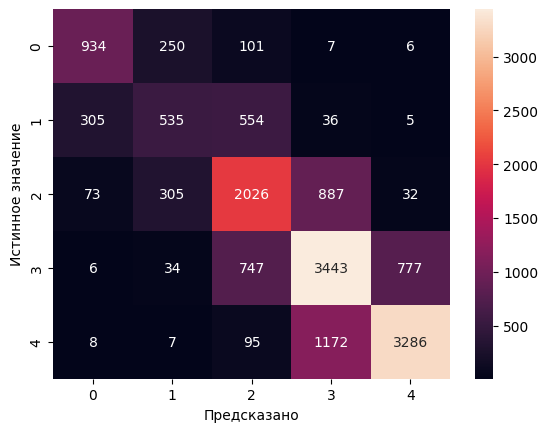

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применение PCA
pca = PCA(n_components=8)
trainX_pca = pca.fit_transform(trainX)
testX_pca = pca.transform(testX)

# Обучение классификатора на данных, преобразованных с помощью PCA
gboost_pca = GradientBoostingClassifier()
gboost_pca.fit(trainX_pca, trainY)

# Оценка качества обучения классификатора на данных, преобразованных с помощью PCA
y_pred_pca = gboost_pca.predict(testX_pca)
accuracy_pca = gboost_pca.score(testX_pca, testY)
print(f"Точность модели Gradient Boosting с PCA: {accuracy_pca}")

# Построение матрицы ошибок
pred_pca = gboost_pca.predict(testX_pca)
cm_pca = sns.heatmap(confusion_matrix(testY, pred_pca), annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Истинное значение")
plt.show()

pca тоже не помог(

по итогу попытки улучшения модели не обернулись успехом,точность осталась такой же примерно, распределение ошибок тоже не поменялось поэтому сравнивать особо не с чем...
